In [1]:
library("ggplot2")
library("dplyr")
library("repr")
library("reshape2")
library("stats")
library("tidyverse")
library("readr")

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v tibble  2.1.1     v purrr   0.3.2
v tidyr   0.8.3     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [2]:
players = read.csv("./fifa23_players_data.csv")
head(players)

Known.As,Full.Name,Overall,Potential,Value.in.Euro.,Positions.Played,Best.Position,Nationality,Image.Link,Age,...,LM.Rating,CM.Rating,RM.Rating,LWB.Rating,CDM.Rating,RWB.Rating,LB.Rating,CB.Rating,RB.Rating,GK.Rating
L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
K. MbappÃ©,Kylian MbappÃ©,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21
M. Salah,Mohamed Salah,90,90,115500000,RW,RW,Egypt,https://cdn.sofifa.net/players/209/331/23_60.png,30,...,90,85,90,74,71,74,70,61,70,25


In [3]:
colnames(players)

[1] "Known.As"                    "Full.Name"                  
 [3] "Overall"                     "Potential"                  
 [5] "Value.in.Euro."              "Positions.Played"           
 [7] "Best.Position"               "Nationality"                
 [9] "Image.Link"                  "Age"                        
[11] "Height.in.cm."               "Weight.in.kg."              
[13] "TotalStats"                  "BaseStats"                  
[15] "Club.Name"                   "Wage.in.Euro."              
[17] "Release.Clause"              "Club.Position"              
[19] "Contract.Until"              "Club.Jersey.Number"         
[21] "Joined.On"                   "On.Loan"                    
[23] "Preferred.Foot"              "Weak.Foot.Rating"           
[25] "Skill.Moves"                 "International.Reputation"   
[27] "National.Team.Name"          "National.Team.Image.Link"   
[29] "National.Team.Position"      "National.Team.Jersey.Number"
[31] "Attacking.Work.Rate"         "Defensive.Work.Rate"        
[33] "Pace.Total"                  "Shooting.Total"             
[35] "Passing.Total"               "Dribbling.Total"            
[37] "Defending.Total"             "Physicality.Total"          
[39] "Crossing"                    "Finishing"                  
[41] "Heading.Accuracy"            "Short.Passing"              
[43] "Volleys"                     "Dribbling"                  
[45] "Curve"                       "Freekick.Accuracy"          
[47] "LongPassing"                 "BallControl"                
[49] "Acceleration"                "Sprint.Speed"               
[51] "Agility"                     "Reactions"                  
[53] "Balance"                     "Shot.Power"                 
[55] "Jumping"                     "Stamina"                    
[57] "Strength"                    "Long.Shots"                 
[59] "Aggression"                  "Interceptions"              
[61] "Positioning"                 "Vision"                     
[63] "Penalties"                   "Composure"                  
[65] "Marking"                     "Standing.Tackle"            
[67] "Sliding.Tackle"              "Goalkeeper.Diving"          
[69] "Goalkeeper.Handling"         "GoalkeeperKicking"          
[71] "Goalkeeper.Positioning"      "Goalkeeper.Reflexes"        
[73] "ST.Rating"                   "LW.Rating"                  
[75] "LF.Rating"                   "CF.Rating"                  
[77] "RF.Rating"                   "RW.Rating"                  
[79] "CAM.Rating"                  "LM.Rating"                  
[81] "CM.Rating"                   "RM.Rating"                  
[83] "LWB.Rating"                  "CDM.Rating"                 
[85] "RWB.Rating"                  "LB.Rating"                  
[87] "CB.Rating"                   "RB.Rating"                  
[89] "GK.Rating"

In [4]:
wageskill <- players[c('Wage.in.Euro.', 'Skill.Moves', 'International.Reputation', 'Value.in.Euro.')]
head(wageskill)
dim(wageskill)

Wage.in.Euro.,Skill.Moves,International.Reputation,Value.in.Euro.
195000,4,5,54000000
450000,4,4,64000000
420000,4,5,84000000
350000,4,4,107500000
230000,5,4,190500000
270000,4,4,115500000


[1] 18539     4

In [5]:
colnames(wageskill)[1] <- "Wage"
colnames(wageskill)[4] <- "Value"
head(wageskill)

Wage,Skill.Moves,International.Reputation,Value
195000,4,5,54000000
450000,4,4,64000000
420000,4,5,84000000
350000,4,4,107500000
230000,5,4,190500000
270000,4,4,115500000


In [6]:
summary(wageskill)

      Wage         Skill.Moves    International.Reputation     Value          
 Min.   :     0   Min.   :1.000   Min.   :1.000            Min.   :        0  
 1st Qu.:  1000   1st Qu.:2.000   1st Qu.:1.000            1st Qu.:   475000  
 Median :  3000   Median :2.000   Median :1.000            Median :  1000000  
 Mean   :  8824   Mean   :2.366   Mean   :1.086            Mean   :  2875461  
 3rd Qu.:  8000   3rd Qu.:3.000   3rd Qu.:1.000            3rd Qu.:  2000000  
 Max.   :450000   Max.   :5.000   Max.   :5.000            Max.   :190500000  

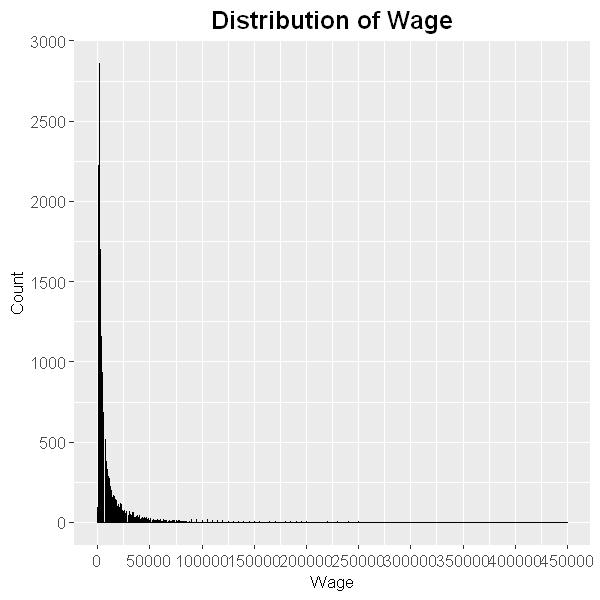

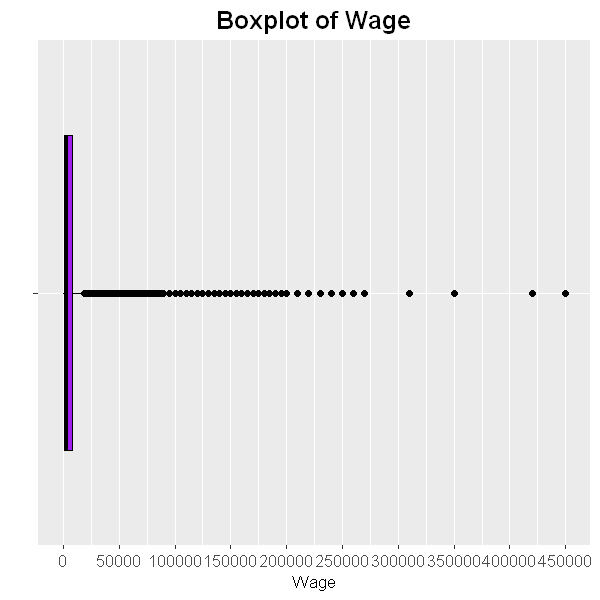

In [7]:
options(repr.plot.width = 5, repr.plot.height = 5) 
#Create the histogram
histogram <- ggplot(wageskill, aes(x = Wage)) + 
  geom_histogram(binwidth = 1, color = "black", fill = "lightpink") +
  
  # Add axis labels and adjust tick marks
  labs(x = "Wage", y = "Count", title = "Distribution of Wage") +
  scale_x_continuous(breaks = seq(0, 450000, by = 50000)) +
  scale_y_continuous(breaks = seq(0, 3000, by = 500)) +

  # Adjust the size of the plot and labels
  theme(plot.title = element_text(size = 15, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 10),
        axis.text = element_text(size = 10)) 

#Create the boxplot
boxplot <- ggplot(wageskill, aes(x = "", y = Wage)) +
  geom_boxplot(color = "black", fill = "purple") +

  # Add axis labels and adjust tick marks
  labs(x = "", y = "Wage", title = "Boxplot of Wage") +
  scale_y_continuous(breaks = seq(0, 450000, by = 50000)) +

  # Adjust the size of the plot and labels
  theme(plot.title = element_text(size = 15, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 10),
        axis.text = element_text(size = 10)) +
  coord_flip() 

plot(histogram)
plot(boxplot)

As we can see from the plot above, the distribution of Wage is very, very skewed. Thus, we have to perform log transformation to the data. 

In [8]:
#Check for zero & null values
colSums(wageskill==0)
colSums(is.na(wageskill))

Wage              Skill.Moves International.Reputation 
                      92                        0                        0 
                   Value 
                     104

Wage              Skill.Moves International.Reputation 
                       0                        0                        0 
                   Value 
                       0

There are 92 zero values in Wage and 104 zero values in Value. Hence, we have to remove the zero values to perform log transformation.

In [9]:
#Remove data with Value == 0
zero_rm_wageskill <- wageskill[wageskill$Value != 0, ]
dim(wageskill)
dim(zero_rm_wageskill)
colSums(zero_rm_wageskill==0)

[1] 18539     4

[1] 18435     4

Wage              Skill.Moves International.Reputation 
                       0                        0                        0 
                   Value 
                       0

In [10]:
#Log transformation of the Wage
zero_rm_wageskill$Wage_log <- log(zero_rm_wageskill$Wage)
summary(zero_rm_wageskill$Wage_log)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  6.215   6.908   8.006   8.057   8.987  13.017 

List of 3
 $ axis.title:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 18
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 $ axis.text :List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 18
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 $ plot.title:List of 11
  ..$ family       : NULL
  ..$ face         : chr "bold"
  ..$ colour       : NULL
  ..$ size         : num 20
  ..$ hjust        : num 0.5
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight

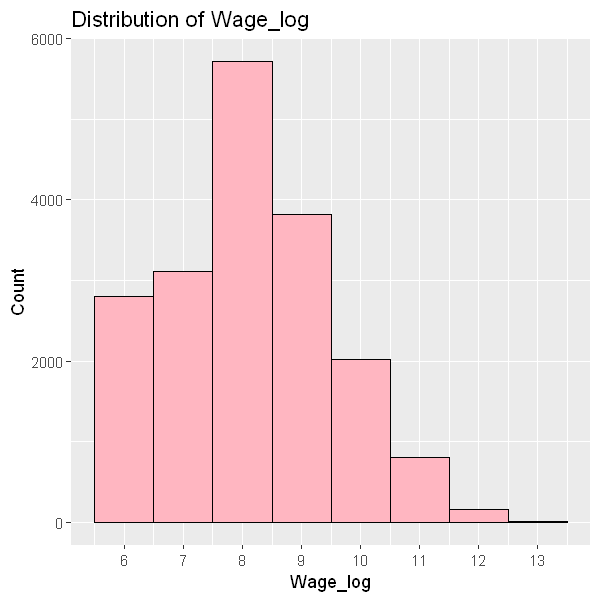

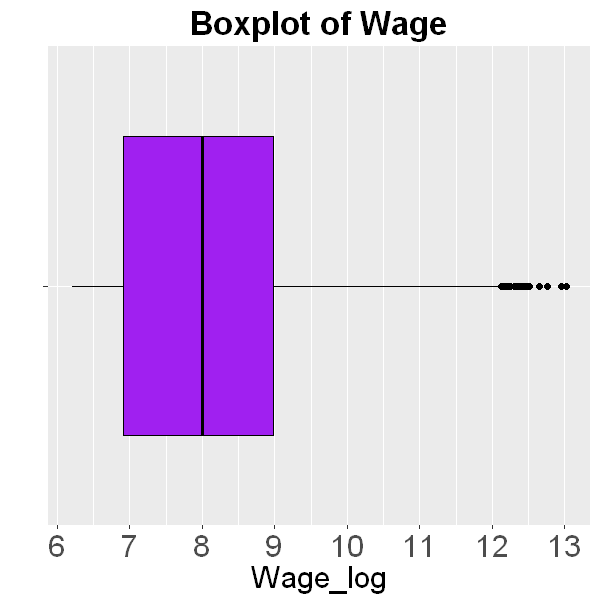

In [11]:
#Create the histogram
histogram <- ggplot(zero_rm_wageskill, aes(x = Wage_log)) + 
  geom_histogram(binwidth = 1, color = "black", fill = "lightpink") +
  
  # Add axis labels and adjust tick marks
  labs(x = "Wage_log", y = "Count", title = "Distribution of Wage_log") +
  scale_x_continuous(breaks = seq(5, 15, by = 1))

  # Adjust the size of the plot and labels
  theme(plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 18),
        axis.text = element_text(size = 18)) 

#Create the boxplot
boxplot <- ggplot(zero_rm_wageskill, aes(x = "", y = Wage_log)) +
  geom_boxplot(color = "black", fill = "purple") +

  # Add axis labels and adjust tick marks
  labs(x = "", y = "Wage_log", title = "Boxplot of Wage") +
  scale_y_continuous(breaks = seq(5, 15, by = 1)) +

  # Adjust the size of the plot and labels
  theme(plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 18),
        axis.text = element_text(size = 18)) +
  coord_flip() 

plot(histogram)
plot(boxplot)

Now the Distribution of Wage is at least more visible and clearer.

List of 3
 $ axis.title:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 18
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 $ axis.text :List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 18
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 $ plot.title:List of 11
  ..$ family       : NULL
  ..$ face         : chr "bold"
  ..$ colour       : NULL
  ..$ size         : num 20
  ..$ hjust        : num 0.5
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight

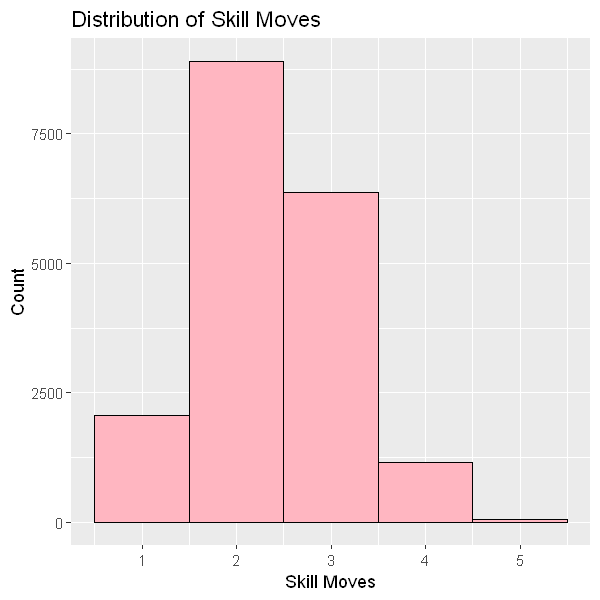

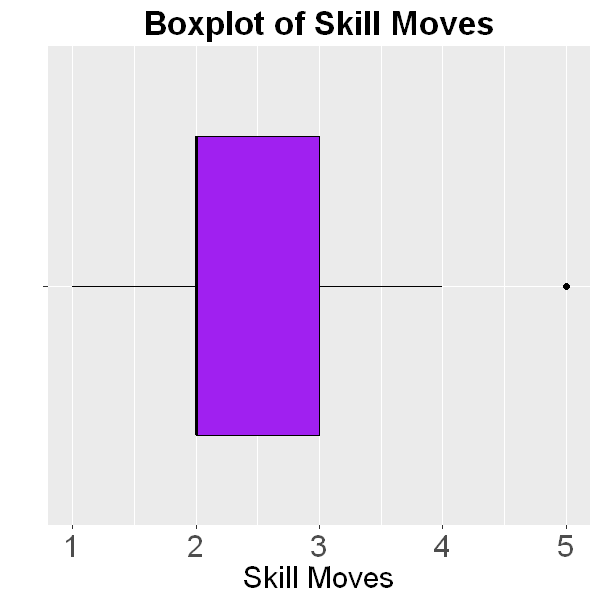

In [12]:
#Create the histogram
histogram <- ggplot(wageskill, aes(x = Skill.Moves)) + 
  geom_histogram(binwidth = 1, color = "black", fill = "lightpink") +
  
  # Add axis labels and adjust tick marks
  labs(x = "Skill Moves", y = "Count", title = "Distribution of Skill Moves") +
  scale_x_continuous(breaks = seq(0, 5, by = 1))

  # Adjust the size of the plot and labels
  theme(plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 18),
        axis.text = element_text(size = 18)) 

#Create the boxplot
boxplot <- ggplot(wageskill, aes(x = "", y = Skill.Moves)) +
  geom_boxplot(color = "black", fill = "purple") +

  # Add axis labels and adjust tick marks
  labs(x = "", y = "Skill Moves", title = "Boxplot of Skill Moves") +
  scale_y_continuous(breaks = seq(1, 5, by = 1)) +

  # Adjust the size of the plot and labels
  theme(plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 18),
        axis.text = element_text(size = 18)) +
  coord_flip() 

plot(histogram)
plot(boxplot)

We can see that the distribution of SKill Moves is slightly right skewed.

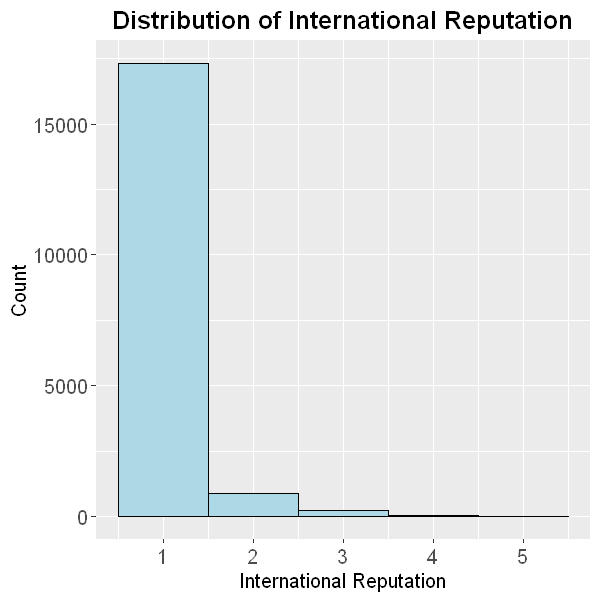

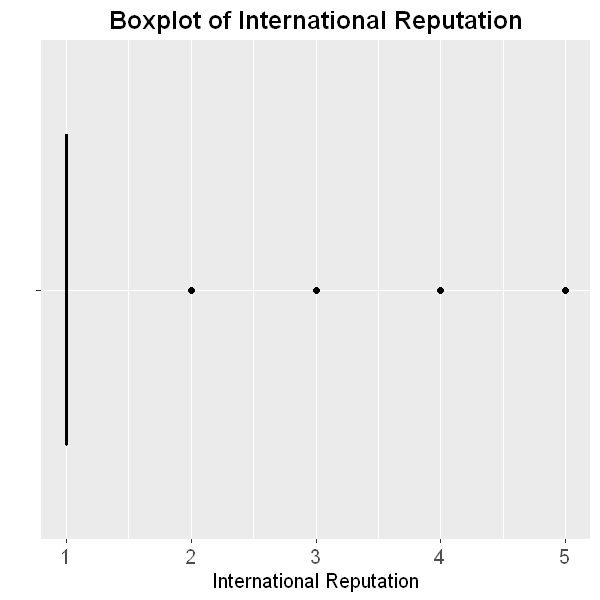

In [13]:
#Create the histogram
histogram <- ggplot(wageskill, aes(x = International.Reputation)) + 
  geom_histogram(binwidth = 1, color = "black", fill = "lightblue") +
  
  # Add axis labels and adjust tick marks
  labs(x = "International Reputation", y = "Count", title = "Distribution of International Reputation") +
  scale_x_continuous(breaks = seq(0, 5, by = 1)) + 

  # Adjust the size of the plot and labels
  theme(plot.title = element_text(size = 15, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 12),
        axis.text = element_text(size = 12)) 

#Create the boxplot
boxplot <- ggplot(wageskill, aes(x = "", y = International.Reputation)) +
  geom_boxplot(color = "black", fill = "lightgreen") +

  # Add axis labels and adjust tick marks
  labs(x = "", y = "International Reputation", title = "Boxplot of International Reputation") +
  scale_y_continuous(breaks = seq(0, 5, by = 1)) +

  # Adjust the size of the plot and labels
  theme(plot.title = element_text(size = 15, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 12),
        axis.text = element_text(size = 12)) +
  coord_flip() 

plot(histogram)
plot(boxplot)

The distribution of International Reputation is very right skewed. Therefore, it is not a relevant variable to use.

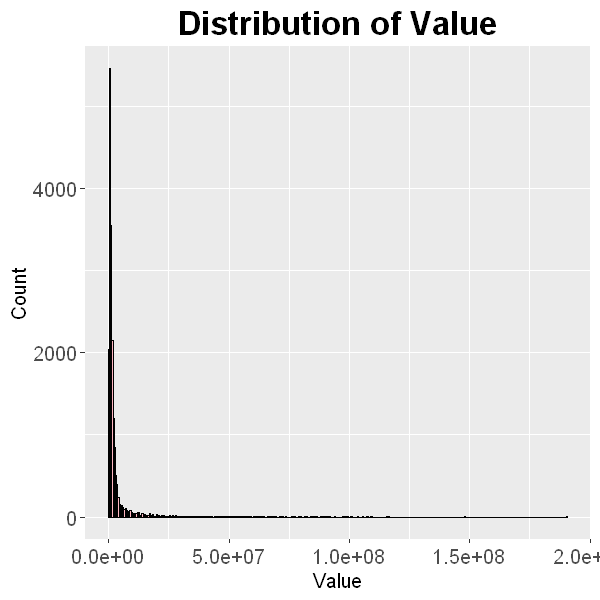

In [15]:
#Create the histogram
histogram <- ggplot(wageskill, aes(x = Value)) + 
  geom_histogram(binwidth = 500000, color = "black", fill = "lightpink") +
  
  # Add axis labels and adjust tick marks
  labs(x = "Value", y = "Count", title = "Distribution of Value") +
#   scale_x_continuous(breaks = seq(45, 95, by = 5)) + 

  # Adjust the size of the plot and labels
  theme(plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 12),
        axis.text = element_text(size = 12)) 

#Create the boxplot
# boxplot <- ggplot(data, aes(x = "", y = Value)) +
#   geom_boxplot(color = "black", fill = "lightgreen") +

#   # Add axis labels and adjust tick marks
#   labs(x = "", y = "Value", title = "Boxplot of Value") +
#   scale_y_continuous(breaks = seq(45, 95, by = 5)) +

#   # Adjust the size of the plot and labels
#   theme(plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
#         axis.title = element_text(size = 18),
#         axis.text = element_text(size = 18)) +
#   coord_flip() 

plot(histogram)
# plot(boxplot)

The value distribution is also very right skewed. Since we have already removed the zero values for Value previously, we now will perform log transformation for Value.

In [16]:
dim(zero_rm_wageskill)
colSums(zero_rm_wageskill == 0)

[1] 18435     5

Wage              Skill.Moves International.Reputation 
                       0                        0                        0 
                   Value                 Wage_log 
                       0                        0

In [17]:
#Log transformation of the Value
zero_rm_wageskill$Value_log <- log(zero_rm_wageskill$Value)
summary(zero_rm_wageskill$Value_log)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  9.105  13.122  13.816  13.894  14.509  19.065 

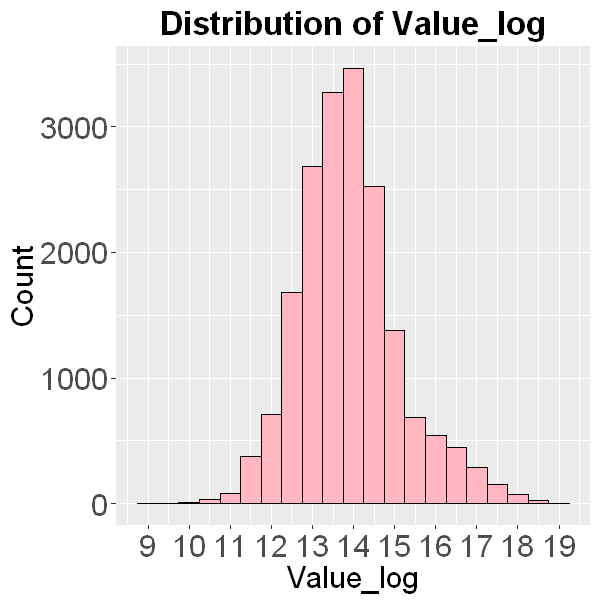

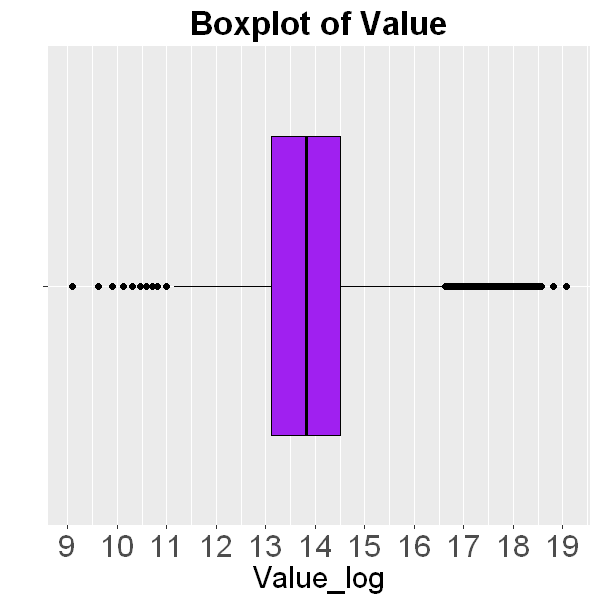

In [18]:
#Create the histogram
histogram <- ggplot(zero_rm_wageskill, aes(x = Value_log)) + 
  geom_histogram(binwidth = 0.5, color = "black", fill = "lightpink") +
  
  # Add axis labels and adjust tick marks
  labs(x = "Value_log", y = "Count", title = "Distribution of Value_log") +
  scale_x_continuous(breaks = seq(8, 20, by = 1)) + 

  # Adjust the size of the plot and labels
  theme(plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 18),
        axis.text = element_text(size = 18)) 

# Create the boxplot
boxplot <- ggplot(zero_rm_wageskill, aes(x = "", y = Value_log)) +
  geom_boxplot(color = "black", fill = "purple") +

  # Add axis labels and adjust tick marks
  labs(x = "", y = "Value_log", title = "Boxplot of Value") +
  scale_y_continuous(breaks = seq(8, 20, by = 1)) +

  # Adjust the size of the plot and labels
  theme(plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 18),
        axis.text = element_text(size = 18)) +
  coord_flip() 

plot(histogram)
plot(boxplot)

The distribution of Value is very close to normal distribution.

In [19]:
library(treemap)
library(treemapify)

ERROR: Error in library(treemap): there is no package called 'treemap'


In [20]:
#Select numerical column
num_cols <- select_if(zero_rm_wageskill, is.numeric)
colnames(num_cols)

[1] "Wage"                     "Skill.Moves"             
[3] "International.Reputation" "Value"                   
[5] "Wage_log"                 "Value_log"

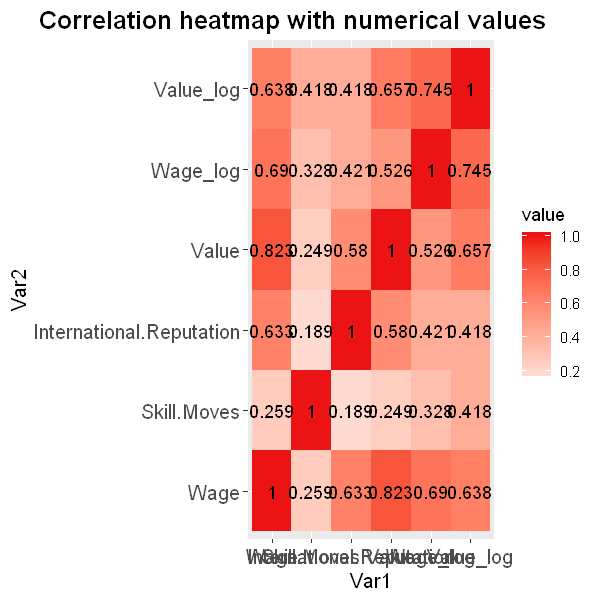

In [24]:
#Correlation of each numerical values
corr_mat <- cor(num_cols)
melted_corr_mat <- melt(corr_mat)

# Create the heatmap
heatmap <- ggplot(data = melted_corr_mat, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile() +
  geom_text(aes(label = round(value, 3))) +
  scale_fill_gradient2(low = "#0066CC", mid = "white", high = "#EB1313", midpoint = 0) +
  labs(title = "Correlation heatmap with numerical values") +
  theme(plot.title = element_text(size = 15, face = "bold", hjust = 0.8),
        axis.title = element_text(size = 12),
        axis.text = element_text(size = 12))

plot(heatmap)

Among the variables, there are a few very interesting observations. 
Value_log and Wage_log is quite highly correlated (r = 0.745)
Value_log and International Reputation has a fairly high positive correlation (r = 0.418) and the correlation is the same as Skill Moves.
Wage_log and International Reputation also has a fairly high positive correlation (r = 0.421) that is higher than that of Wage_log and Skill Moves (r = 0.328)
International Reputation and Skill Moves have relatively low positive correlation (r = 0.189)

# ONE SAMPLE T-TEST ON BMI (ADD weight and height distribution histogram)

Now we are going to carry out a one-sample t-test on whether the BMI of the FIFA players fall within a certain range. It's always a question whether all of the atheletes in football are very fit and built, therefore we are going to test whether all of the FIFA players' BMI fall within 18.5 to 24.9. To use one-sample t-test, we will test whether the average BMI falls on the value (18.5 + 24.9)/2 which is 21.7. Then, we will also construct a confidence interval with alpha = 0.05 and see if the BMI does fall in the stipulated range.

Now let's extract the Weight and Height of the players from the players dataframe.

In [90]:
BMI <- subset(players, select = c(Weight.in.kg., Height.in.cm.))
BMI

Weight.in.kg.,Height.in.cm.
67,169
81,185
81,185
70,181
73,182
71,175
96,199
93,193
83,187
92,193


Change the names of the columns to Weight and Height respectively

In [34]:
column_names <- colnames(BMI)
column_names[column_names == "Weight.in.kg."] <- "Weight"
column_names[column_names == "Height.in.cm."] <- "Height"
colnames(BMI) <- column_names

Now we are going to create a new column named BMI that is all of the BMIs of the players using the formula Weight/(Height/100)^2

In [38]:
BMI <- BMI %>%
    mutate (BMI = Weight / (Height/100)^2)

Now we are all set to perform our one-sample t-test on our data.

In [41]:
t.test(BMI$BMI, mu = 21.7)


	One Sample t-test

data:  BMI$BMI
t = 105.79, df = 18538, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 21.7
95 percent confidence interval:
 22.76332 22.80346
sample estimates:
mean of x 
 22.78339 


From the data obtained, it looks like we have obtained very interesting result. The null hypothesis of all the BMI of players fall onto the value 21.7 is rejected, which is pretty much expected. However, the confidence interval for the mean of the BMI of all the players is unexpectedly very tight, with the width only 0.04014, which is significantly tighter than usual. This can only be explained by that most of the FIFA players' BMI is on the upper range of the range 18.5 to 24.9, specifically around 22.0 to 23.0.

# PROP.TEST~~ Overall? Choose a suitable median/any proportion that can give good insights. (Contuinuity correction rip spelling)

Since our Wage distribution of the players is heavily right skewed, it is best if we can try and perform quantile test on it to gain more insights on the distribution of the Wage of the players.

In [44]:
zero_rm_wageskill

,Wage,Skill.Moves,International.Reputation,Value,Wage_log,Value_log
1,195000,4,5,54000000,12.18075,17.80449
2,450000,4,4,64000000,13.01700,17.97439
3,420000,4,5,84000000,12.94801,18.24633
4,350000,4,4,107500000,12.76569,18.49300
5,230000,5,4,190500000,12.34583,19.06516
6,270000,4,4,115500000,12.50618,18.56478
7,250000,1,4,90000000,12.42922,18.31532
8,72000,1,5,13500000,11.18442,16.41820
9,220000,5,5,41000000,12.30138,17.52908
10,230000,2,4,98000000,12.34583,18.40048


In [45]:
t.test(zero_rm_wageskill$Wage) #TO BE DELETED, JUST TO SEE SEE DISTRIBUTION


	One Sample t-test

data:  zero_rm_wageskill$Wage
t = 61.731, df = 18434, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 8583.682 9146.663
sample estimates:
mean of x 
 8865.172 


In [54]:
wage_quantiles <- quantile(zero_rm_wageskill$Wage, probs = c(0.25, 0.3, 0.321, 0.5, 0.75, 0.9, 0.95, 0.99)) 
wage_quantiles# TO BE DELETED AS WELL, THIS IS JUST A CHEAT CODE FOR YALL TO SEE.

25%   30% 32.1%   50%   75%   90%   95%   99% 
 1000  1000  2000  3000  8000 22000 38000 90000

Now, we are going to perform a quantile test on the wage of the players. Our null hypothesis would be the 95% quantile is 30000, and the alternative hypothesis would then be the 95% percentile is not 30000.

In [64]:
n <- length(zero_rm_wageskill$Wage)
n

[1] 18435

Set p equals to the 95th percentile

In [65]:
p <- 0.95

Calculate the number of observations less than or equal to xp = 30000

In [70]:
t1 <- sum(zero_rm_wageskill$Wage <= 30000)
t1

[1] 17199

Calculate the number of observations less than xp = 30000

In [71]:
t2 <- sum(zero_rm_wageskill$Wage < 30000)
t2

[1] 17131

Calculate n*p

In [74]:
n*p

[1] 17513.25

Since t1 is too small (<np), we will use the formula of 2*Pr(Y<=t1)

In [73]:
2*pbinom(17199,18435,0.95)

[1] 5.15199e-24

Based on our quantile test, we reject our null hypothesis that the 95th percentile is 30000.

Now let's preform another quantile test to test. Since our wage distribution is so right skewed, it means that there are very, very less people with a very high wage. Therefore, let's have our null hypothesis be the 75th percentile is 8000, and the alternative hypothesis be the 75th percentile is not 8000.

In [76]:
n <- length(zero_rm_wageskill$Wage)
n

[1] 18435

Set p equals to the 95th percentile

In [77]:
p <- 0.75

Calculate the number of observations less than or equal to xp = 8000

In [84]:
t1 <- sum(zero_rm_wageskill$Wage <= 8000)
t1

[1] 14140

Calculate the number of observations less than xp = 8000

In [85]:
t2 <- sum(zero_rm_wageskill$Wage < 8000)
t2

[1] 13758

Calculate n*p

In [86]:
n*p

[1] 13826.25

Here t1 is not too small (>np) and t2 is not too large (>np), hence, we will try both methods and see.

In [89]:
2*(1-pbinom(13758-1,18435,0.75))
2*(pbinom(14140, 18435, 0.75))

[1] 1.757537

[1] 2

As we can see from the result, there is not enough evidence to support the alternative hypothesis. Therefore, it can be concluded that the 75th percentile of Wage distribution is 8000, which is quite crazy, as we can see from the Wage distribution that there are players with wage over 200000, but there are 75% of people's wage is less than or equal to 8000.